## Regression Fundamentals

### A Case Study in predicting house prices & Simple Linear Regression

In order to determine the listing price of your house you are going to sell, need to look at "How much did other houses sell for?"

- Task 1: Which model f(x) should I choose? (simple line? quadratic? etc.)
- Task 2: Estimate function f(x) from given data

#### Simple Linear Regression

yi = w0 + w1xi  (y1: predicted output)

- regression coefficients (w0, w1)
- Residual sum of squares(RSS)
<img src='RSS.JPG'>

### Optimization: one dimensional objective

#### Gradient Descent

<img src='gradient descent.JPG'>

Finding max or min

- Method 1) Use "derivative = 0"
- Method 2) Hill Climbing or Descent algorithm
  - Convex func: If derivative is positive, increase w to find max g(w)
  - Concave func: If derivative is positive, decrease w to find min g(w)

<img src='hill climbing.JPG'>
<img src='hill descent.JPG'>

## Optimization: Multi dimensional objective

If you take the derivative of RSS(w0, w1) with respect to w0 and w1, the derivative of RSS is as follows:

<img src='RSS derivative.JPG'>

### 2 Approaches to getting the best fitting line

- Approach 1:  Solving "Gradient=0"
- Approach 2: Gradient Descent

- For most ML problems, cannot solve gradient=0. Even if solving gradient=0 is feasible, gradient descent can be more efficient
- Gradient descent relies on choosing stepsize and oonvergence criteria

## Applying Simple Linear Regression on Real Data 

### Exploration of Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [2]:
sales = pd.read_csv('Philadelphia_Crime_Rate_noNA.csv')

In [3]:
sales.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks


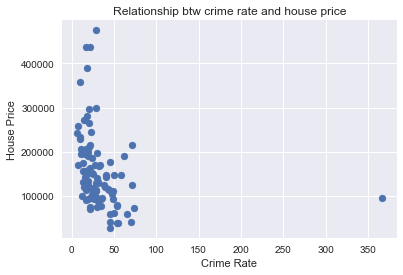

In [4]:
plt.scatter(sales['CrimeRate'],sales['HousePrice'])
plt.gca().set_xlabel('Crime Rate')
plt.gca().set_ylabel('House Price')
plt.gca().set_title('Relationship btw crime rate and house price')

### Fitting Data in Linear Regression Model

In [5]:
model = LinearRegression()

In [6]:
X = sales['CrimeRate'].values[:,np.newaxis]
y = sales['HousePrice'].values

In [7]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

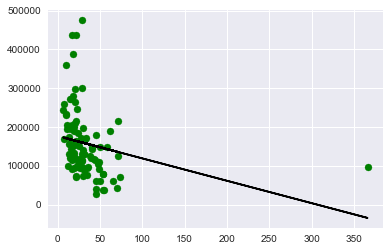

In [8]:
plt.scatter(X, y, color='g')
plt.plot(X, model.predict(X), color='k')

The graph above shows that the predicted linear graph is inaccurate because of the one outlier data on the far right. Seems like the outlier data is having immense influence on the prediction process. We need to fix this.

### Adjusting Data for better prediction

Center City is the one observation with an extremely high crime rate, yet house prices are not very low. This point does not follow the trend of the rest of the data very well. A question is how much including Center City is influencing our fit on the other datapoints. Let's remove this datapoint and see what happens.

In [9]:
sales_noCC = sales[sales['MilesPhila'] != 0.0]

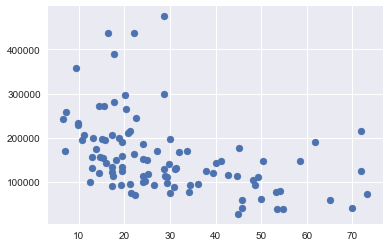

In [10]:
plt.scatter(sales_noCC['CrimeRate'], sales_noCC['HousePrice'])

### Forming new model with adjusted data

In [11]:
adjusted_model = LinearRegression()

In [12]:
X2 = sales_noCC['CrimeRate'].values[:,np.newaxis]
y2 = sales_noCC['HousePrice'].values

In [13]:
adjusted_model.fit(X2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

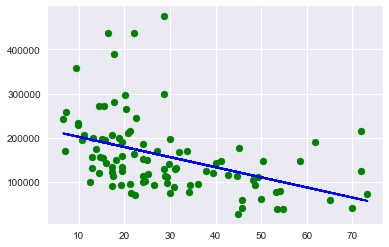

In [14]:
plt.scatter(X2, y2, color='g')
plt.plot(X2, adjusted_model.predict(X2), color='b')

The graph above looks much better than the first one. Let's numerically see how the new model is better than the first one.

### Looking at coefficients for comparison of models

In [15]:
def eval_linear_regr_models(mdl,x,y):
    """Evaluating performance of each linear regression model
    with coefficients, mean squared error and the score metric
    model,x,y=>prints out coefficients, MSE and variance score
    """
    # The coefficients
    print('Coefficients: \n', mdl.coef_)

    # The mean squared error
    print("Mean squared error: %.2f"
          % np.mean((mdl.predict(x) - y) ** 2))

    # Explained variance score: 1 is perfect prediction
    # 1 - (MSE / y value variance)
    print('Variance score: %.2f' % mdl.score(x, y))

In [16]:
eval_linear_regr_models(model, X, y)

Coefficients: 
 [-576.90812768]
Mean squared error: 6967063954.55
Variance score: 0.06


In [17]:
eval_linear_regr_models(adjusted_model, X, y)

Coefficients: 
 [-2288.68942995]
Mean squared error: 11106200904.54
Variance score: -0.49


##### We can see from above that the RMSE of the adjusted model is lower than that of the first model